In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Đồ án chuyên ngành KHDL/Dataset/Vcb.csv')
df

,DATE,Revenue,Profit_Before_Tax,Net_Profit,Profit_Margin,Customer_Loans,Loans_from_Other_Organizations,Number_of_Customers,Customer_Classification
0,30/06/2009,12732,4068,6213,48.798303,23360,14092,2705,Retail
1,1/7/2009,31243,4463,1411,4.516212,6582,14863,1090,SME
2,2/7/2009,40403,8629,1807,4.472440,23869,15019,7832,Corporate
3,3/7/2009,42103,1082,1392,3.306178,34905,9246,3424,Retail
4,6/7/2009,30757,4843,926,3.010697,27201,2930,9234,Corporate
...,...,...,...,...,...,...,...,...,...
2637,24/06/2022,24144,9192,3921,16.240060,39580,8279,1985,Corporate
2638,27/06/2022,43800,9727,2322,5.301370,14430,10040,8403,Retail
2639,28/06/2022,45779,5852,7934,17.331091,13615,15608,4143,SME
2640,29/06/2022,37398,5718,7575,20.255094,19816,17877,7913,Retail


In [ ]:
# hiển thị số dòng và số cột của dữ liệu

rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 2642
Number Of Columns : 9


In [ ]:
# Hiển thị mẫu dữ liệu

df.sample(1).iloc[0]

,1370
DATE,31/05/2017
Revenue,44274
Profit_Before_Tax,6892
Net_Profit,2274
Profit_Margin,5.136197
Customer_Loans,33672
Loans_from_Other_Organizations,8490
Number_of_Customers,2997
Customer_Classification,SME


In [ ]:
# Xuất ra dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATE                            2642 non-null   object 
 1   Revenue                         2642 non-null   int64  
 2   Profit_Before_Tax               2642 non-null   int64  
 3   Net_Profit                      2642 non-null   int64  
 4   Profit_Margin                   2642 non-null   float64
 5   Customer_Loans                  2642 non-null   int64  
 6   Loans_from_Other_Organizations  2642 non-null   int64  
 7   Number_of_Customers             2642 non-null   int64  
 8   Customer_Classification         2642 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 185.9+ KB


In [ ]:
# Xuất ra bản kê
df.describe()

,Revenue,Profit_Before_Tax,Net_Profit,Profit_Margin,Customer_Loans,Loans_from_Other_Organizations,Number_of_Customers
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,29983.992808,5499.935276,4735.579864,19.107545,22292.774413,10573.419001,5463.739591
std,11602.479971,2606.806296,2426.413250,14.282575,10204.573532,5493.715167,2575.883075
min,10043.000000,1001.000000,504.000000,1.037699,5005.000000,1002.000000,1001.000000
25%,19777.250000,3235.250000,2656.000000,8.919645,13208.250000,5778.500000,3266.000000
50%,30114.500000,5495.000000,4757.000000,15.997090,22229.000000,10570.500000,5375.500000
75%,40076.000000,7729.250000,6817.500000,24.821189,31241.000000,15324.250000,7701.500000
max,49979.000000,9997.000000,8999.000000,85.183741,39997.000000,19982.000000,9995.000000


In [ ]:
df.nunique()

,0
DATE,2642
Revenue,2558
Profit_Before_Tax,2294
Net_Profit,2278
Profit_Margin,2642
Customer_Loans,2544
Loans_from_Other_Organizations,2457
Number_of_Customers,2282
Customer_Classification,3


In [ ]:
#Xuất ra 5 dòng trên cùng
df.head()

,DATE,Revenue,Profit_Before_Tax,Net_Profit,Profit_Margin,Customer_Loans,Loans_from_Other_Organizations,Number_of_Customers,Customer_Classification
0,30/06/2009,12732,4068,6213,48.798303,23360,14092,2705,Retail
1,1/7/2009,31243,4463,1411,4.516212,6582,14863,1090,SME
2,2/7/2009,40403,8629,1807,4.472440,23869,15019,7832,Corporate
3,3/7/2009,42103,1082,1392,3.306178,34905,9246,3424,Retail
4,6/7/2009,30757,4843,926,3.010697,27201,2930,9234,Corporate


In [ ]:
# Xác định các cột không phải số
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['DATE', 'Customer_Classification'], dtype='object')

In [ ]:
# Chuyển đổi cột DATE thành kiểu dữ liệu datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Chỉ tính tương quan cho các cột số
df_numeric = df.drop(columns=non_numeric_cols)
df_numeric.corr()

<ipython-input-283-11b7467405fe>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE'] = pd.to_datetime(df['DATE'])


,Revenue,Profit_Before_Tax,Net_Profit,Profit_Margin,Customer_Loans,Loans_from_Other_Organizations,Number_of_Customers
Revenue,1.000000,-0.016836,0.003892,-0.599832,-0.011731,0.004588,0.017565
Profit_Before_Tax,-0.016836,1.000000,0.004120,0.011258,0.011033,-0.028840,-0.017503
Net_Profit,0.003892,0.004120,1.000000,0.678903,-0.023781,0.011795,0.009391
Profit_Margin,-0.599832,0.011258,0.678903,1.000000,-0.015738,0.008552,-0.012137
Customer_Loans,-0.011731,0.011033,-0.023781,-0.015738,1.000000,0.016885,0.029173
Loans_from_Other_Organizations,0.004588,-0.028840,0.011795,0.008552,0.016885,1.000000,0.022109
Number_of_Customers,0.017565,-0.017503,0.009391,-0.012137,0.029173,0.022109,1.000000


<Axes: >

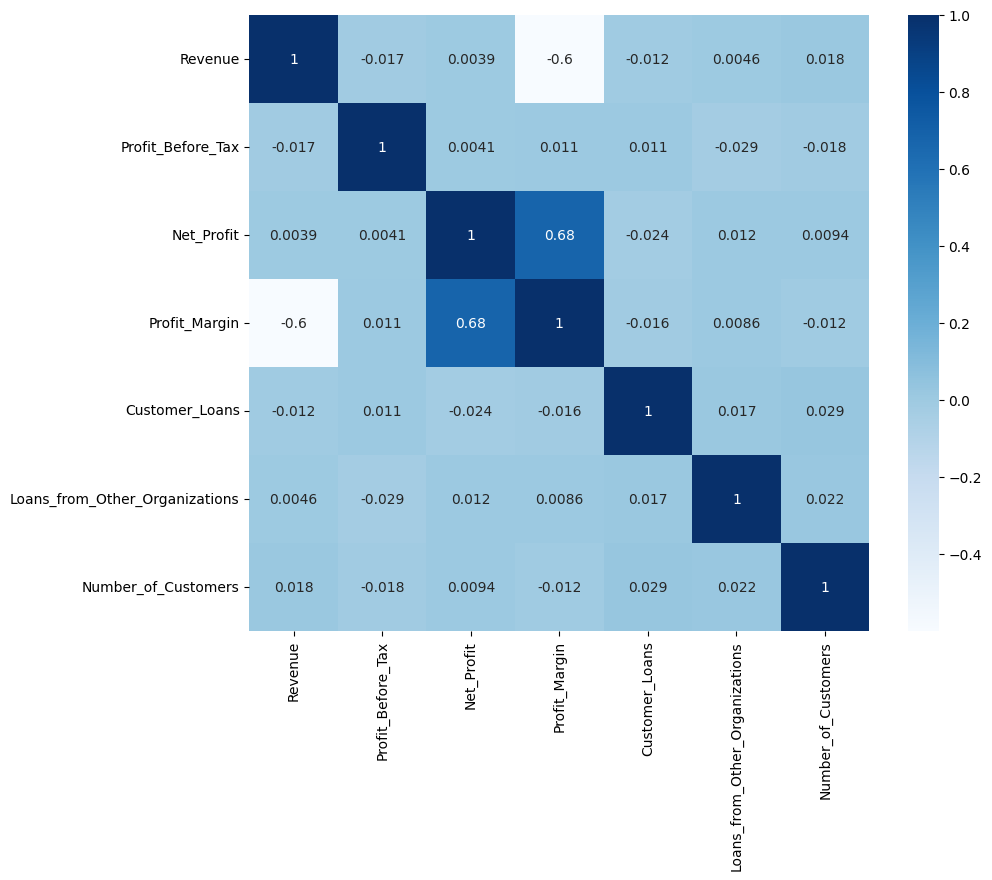

In [ ]:
#Trực quan hóa về bảng tương quan
plt.figure(figsize=(10, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
# Kiểm tra các giá trị Null trong bộ dữ liệu
df.isnull().sum()

,0
DATE,0
Revenue,0
Profit_Before_Tax,0
Net_Profit,0
Profit_Margin,0
Customer_Loans,0
Loans_from_Other_Organizations,0
Number_of_Customers,0
Customer_Classification,0


In [ ]:
#Kiểm tra các dòng có bị trùng hay không
df.duplicated().sum()


0

Kiểm tra các giá trị ngoại lai trong bộ dữ liệu

In [ ]:
# Các cột
print(df.columns)


Index(['DATE', 'Revenue', 'Profit_Before_Tax', 'Net_Profit', 'Profit_Margin',
       'Customer_Loans', 'Loans_from_Other_Organizations',
       'Number_of_Customers', 'Customer_Classification'],
      dtype='object')


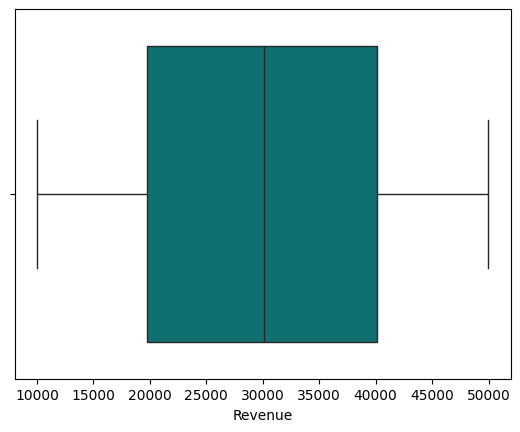

In [ ]:
# Kiểm tra theo biểu đồ Boxplot ở cột Revenue
sns.boxplot(x = df.Revenue, color='teal')
plt.show()

Không xuất hiện dấu chấm chứng tỏ không có dữ liệu ngoại lai


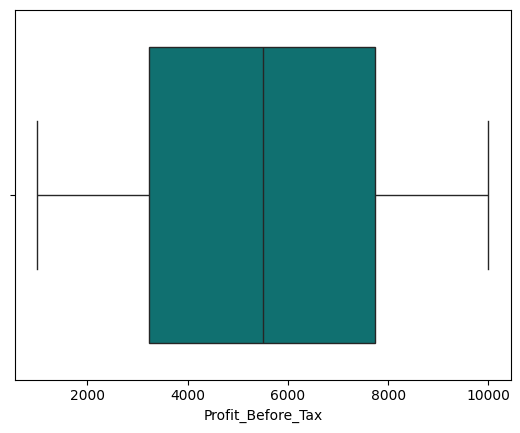

In [ ]:
# Kiểm tra theo biểu đồ Boxplot ở cột Profit_Before_Tax
sns.boxplot(x = df.Profit_Before_Tax, color='teal')
plt.show()

Không xuất hiện dấu chấm chứng tỏ không có dữ liệu ngoại lai

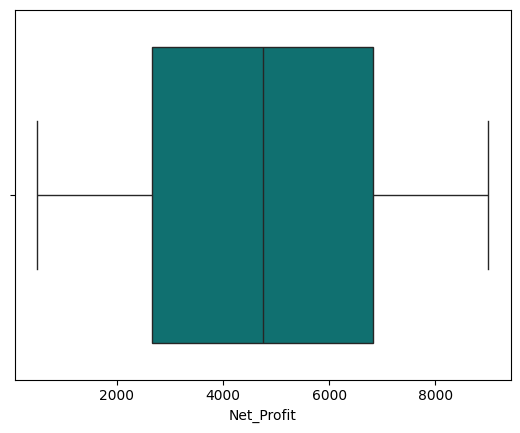

In [ ]:
# Kiểm tra theo biểu đồ Boxplot ở cột Net_Profit
sns.boxplot(x = df.Net_Profit, color='teal')
plt.show()

Không xuất hiện dấu chấm chứng tỏ không có dữ liệu ngoại lai

Xem xét các chỉ số lợi nhuận như doanh thu, lợi nhuận trước thuế, lợi nhuận ròng và biên lợi nhuận.Xem xét các khoản nợ của ngân hàng, bao gồm nợ vay từ khách hàng và nợ vay từ các tổ chức khác. Thông tin về số lượng và phân loại khách hàng, Trực quan hóa, (xây dựng thực nghiệm)

* Xem xét các chỉ số lợi nhuận như doanh thu, lợi nhuận trước thuế, lợi nhuận ròng và biên lợi nhuận.

In [ ]:
# Nhóm theo năm
data_grouped_by_year = df.groupby(df['DATE'].dt.year)

DOANH THU(REVENUE) THEO NĂM

In [ ]:
# Tính toán tổng Doanh thu theo năm(Revenue)
revenue_by_year = data_grouped_by_year['Revenue'].sum()
print("Doanh thu theo năm:")
print(revenue_by_year)

Doanh thu theo năm:
DATE
2009    3922851
2010    7549976
2011    6616244
2014    5274531
2015    7437600
2016    7300397
2017    7835207
2018    7359725
2019    7409497
2020    7561578
2021    7401359
2022    3548744
Name: Revenue, dtype: int64


DỰ ĐOÁN DOANH THU(REVENUE) THEO NĂM CHO NĂM TIẾP THEO

In [ ]:
# Tạo DataFrame từ dữ liệu doanh thu
X_revenue = revenue_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_revenue = revenue_by_year.values  # doanh thu (target)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model_rf.fit(X_train_revenue, y_train_revenue)

# Dự đoán và đánh giá
y_pred_rf = model_rf.predict(X_test_revenue)
mse_rf = mean_squared_error(y_test_revenue, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 5430220770430.937


In [ ]:
# Khởi tạo mô hình Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)

# Huấn luyện mô hình
model_dt.fit(X_train_revenue, y_train_revenue)

# Dự đoán và đánh giá
y_pred_dt = model_dt.predict(X_test_revenue)
mse_dt = mean_squared_error(y_test_revenue, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")


Decision Tree MSE: 9340602244803.666


In [ ]:
# Khởi tạo mô hình KNN
model_knn = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_knn.fit(X_train_revenue, y_train_revenue)

# Dự đoán và đánh giá
y_pred_knn = model_knn.predict(X_test_revenue)
mse_knn = mean_squared_error(y_test_revenue, y_pred_knn)
print(f"KNN MSE: {mse_knn}")


KNN MSE: 3445671985975.888


In [ ]:
# So sánh MSE của các mô hình
print(f"Random Forest MSE: {mse_rf}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"KNN MSE: {mse_knn}")


Random Forest MSE: 5430220770430.937
Decision Tree MSE: 9340602244803.666
KNN MSE: 27737855185283.332


Từ 3 mô hình dự đoán bao gồm: K-Nearest Neighbors, Random Forest, Decision Tree Classifier. Ta có thể thấy được rằng mô hình K-Nearest Neighbors là mô hình có khả năng dự đoán tốt nhất nên ta sẽ sử dụng K-Nearest Neighbors đối với các đối tượng còn lại

In [ ]:
# Dự đoán doanh thu cho năm tiếp theo (2023 chẳng hạn)
predicted_revenue_2023 = model_knn.predict([[2023]])
print(f"Dự đoán doanh thu cho năm 2023: {predicted_revenue_2023[0]}")

Dự đoán doanh thu cho năm 2023: 6105988.666666667


TRỰC QUAN HOÁ DOANH THU THEO NĂM(REVENUE)

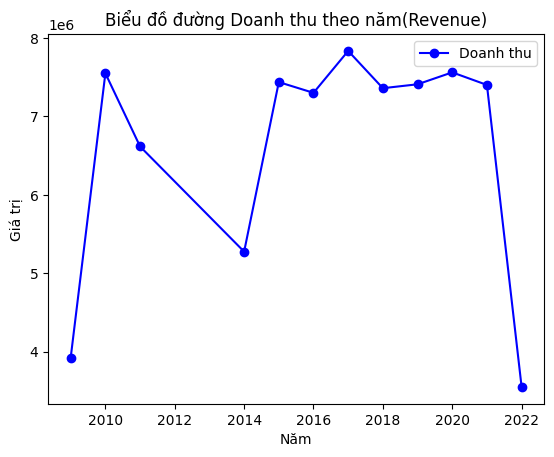

In [ ]:
# Biểu đồ đường cho Doanh thu theo năm(Revenue)
revenue_by_year.plot(kind='line',marker='o', label='Doanh thu', color='b')

plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.title('Biểu đồ đường Doanh thu theo năm(Revenue)')
plt.legend()
plt.show()

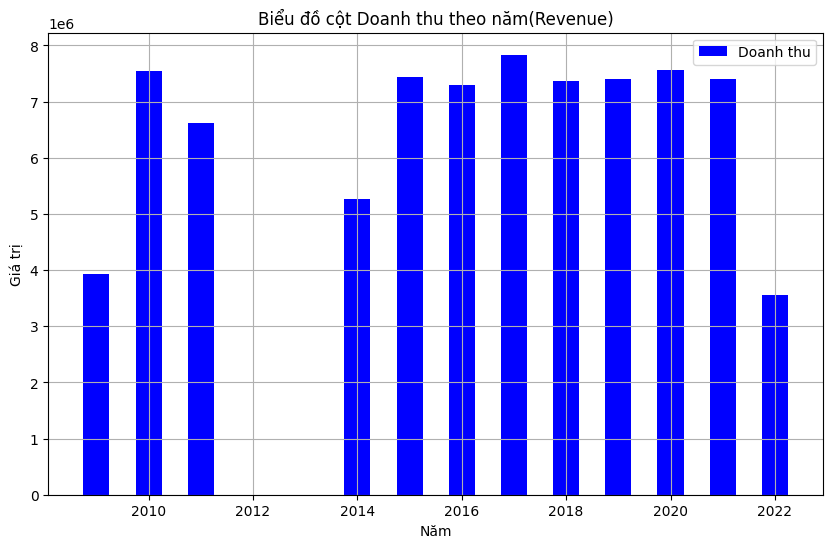

In [ ]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
width = 0.5
bar1 = ax.bar(revenue_by_year.index, revenue_by_year, width, label='Doanh thu',color='b')

# Set the labels and title
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị')
ax.set_title('Biểu đồ cột Doanh thu theo năm(Revenue)')
ax.legend()
plt.grid()
plt.show()

LỢI NHUÂN TRƯỚC THUẾ THEO NĂM

In [ ]:
# Tính toán tổng Lợi nhuận trước thuế theo năm(Profit_Before_Tax)
profit_before_tax_by_year = data_grouped_by_year['Profit_Before_Tax'].sum()
print("\nLợi nhuận trước thuế theo năm:")
print(profit_before_tax_by_year)



Lợi nhuận trước thuế theo năm:
DATE
2009     732979
2010    1397386
2011    1270250
2014     931125
2015    1358174
2016    1349658
2017    1392309
2018    1307311
2019    1317258
2020    1385436
2021    1420322
2022     668621
Name: Profit_Before_Tax, dtype: int64


DỰ ĐOÁN LỢI NHUÂN TRƯỚC THUẾ THEO NĂM CHO NĂM TIẾP THEO

In [ ]:
# Tạo DataFrame từ dữ liệu lợi nhuận trước thuế
X_profit_before = profit_before_tax_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_profit_before = profit_before_tax_by_year.values  # Lợi nhuận trước thuế (target)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_profit_before, X_test_profit_before, y_train_profit_before, y_test_profit_before = train_test_split(X_profit_before, y_profit_before, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình KNN
model_profit_before = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_profit_before.fit(X_train_profit_before, y_train_profit_before)

# Dự đoán và đánh giá
y_pred_profit_before = model_profit_before.predict(X_test_profit_before)
mse_knn = mean_squared_error(y_test_profit_before, y_pred_knn)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 25756739122946.668


In [ ]:
# Dự đoán lợi nhuận trước thuế cho năm tiếp theo (2023 chẳng hạn)
predicted_profit_before_2023 = model_profit_before.predict([[2023]])
print(f"Dự đoán lợi nhuận trước thuế cho năm 2023: {predicted_profit_before_2023[0]}")

Dự đoán lợi nhuận trước thuế cho năm 2023: 1097730.0


TRỰC QUAN HOÁ LỢI NHUÂN TRƯỚC THUẾ THEO NĂM

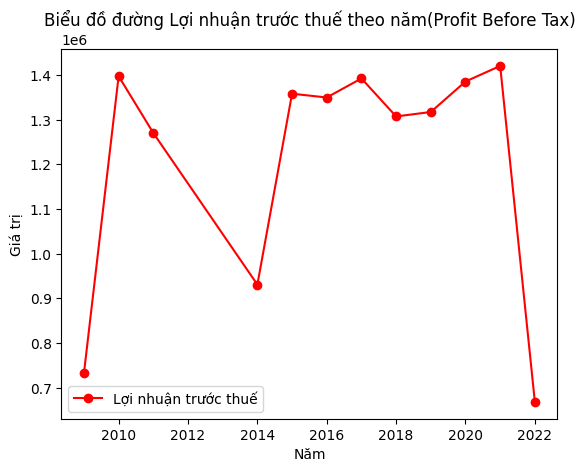

In [ ]:
# Biểu đồ đường cho Lợi nhuận trước thuế theo năm(Profit Before Tax)
profit_before_tax_by_year.plot(kind='line',marker='o', label='Lợi nhuận trước thuế',color='r')

plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.title('Biểu đồ đường Lợi nhuận trước thuế theo năm(Profit Before Tax)')
plt.legend()
plt.show()

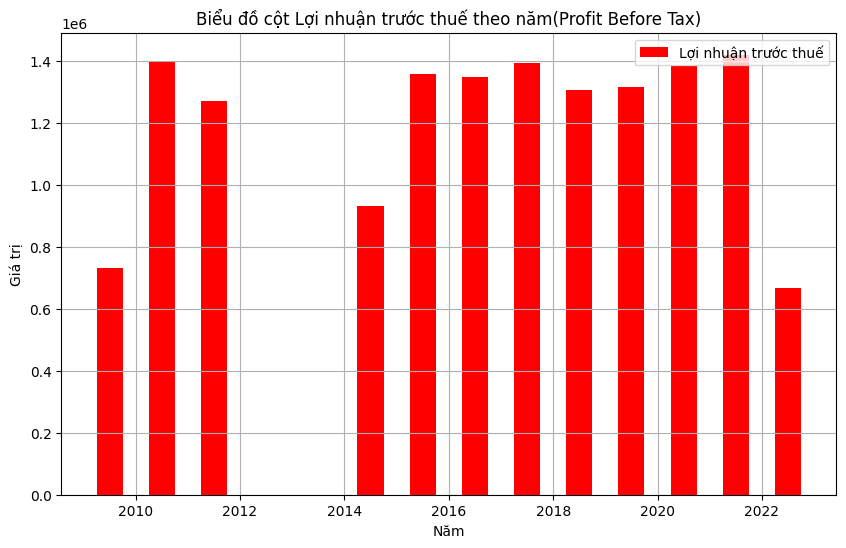

In [ ]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
width = 0.5
bar2 = ax.bar(profit_before_tax_by_year.index + width, profit_before_tax_by_year, width, label='Lợi nhuận trước thuế',color='r')

# Set the labels and title
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị')
ax.set_title('Biểu đồ cột Lợi nhuận trước thuế theo năm(Profit Before Tax)')
ax.legend()
plt.grid()
plt.show()

LỢI NHUẬN RÒNG THEO NĂM(Net_Profit)

In [ ]:
# Tính toán Lợi nhuận ròng theo năm(Net_Profit)
net_profit_by_year = data_grouped_by_year['Net_Profit'].sum()
print("\nLợi nhuận ròng theo năm:")
print(net_profit_by_year)


Lợi nhuận ròng theo năm:
DATE
2009     619472
2010    1177729
2011    1103492
2014     819622
2015    1202422
2016    1104528
2017    1161764
2018    1227942
2019    1176790
2020    1186683
2021    1139574
2022     591384
Name: Net_Profit, dtype: int64


DỰ ĐOÁN LỢI NHUẬN RÒNG THEO NĂM(Net_Profit) CHO NĂM TIẾP THEO

In [ ]:
# Tạo DataFrame từ dữ liệu lợi nhuận ròng
X_net_profit = net_profit_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_net_profit = net_profit_by_year.values  # Lợi nhuận trước thuế (target)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_net_profit, X_test_net_profit, y_train_net_profit, y_test_net_profit = train_test_split(X_net_profit, y_net_profit, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình KNN
model_net_profit = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_net_profit.fit(X_train_net_profit, y_train_net_profit)

# Dự đoán và đánh giá
y_pred_net_profit = model_knn.predict(X_test_net_profit)
mse_knn = mean_squared_error(y_test_net_profit, y_pred_knn)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 27737855185283.332


In [ ]:
# Dự đoán lợi nhuận ròng cho năm tiếp theo (2023 chẳng hạn)
predicted_net_profit_2023 = model_knn.predict([[2023]])
print(f"Dự đoán lợi nhuận ròng cho năm 2023: {predicted_net_profit_2023[0]}")

Dự đoán lợi nhuận ròng cho năm 2023: 6105988.666666667


TRỰC QUAN HOÁ LỢI NHUẬN RÒNG THEO NĂM(Net_Profit)

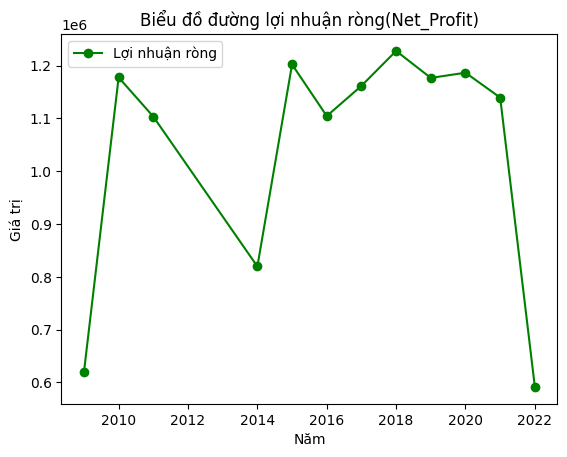

In [ ]:
# Biểu đồ đường cho lợi nhuận ròng(Net_Profit)
net_profit_by_year.plot(kind='line',marker='o', label='Lợi nhuận ròng',color='green')

plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.title('Biểu đồ đường lợi nhuận ròng(Net_Profit)')
plt.legend()
plt.show()

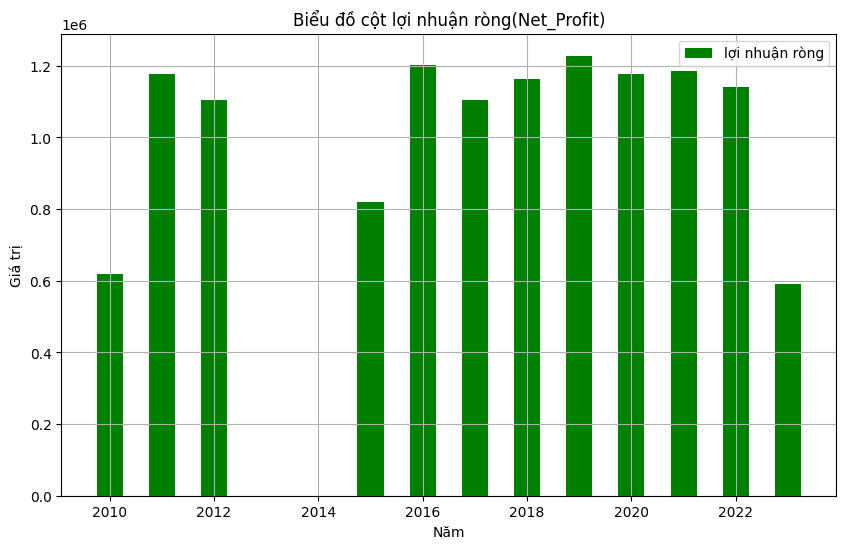

In [ ]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
width = 0.5
bar3 = ax.bar(net_profit_by_year.index + 2*width, net_profit_by_year, width, label='lợi nhuận ròng',color='green')

# Set the labels and title
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị')
ax.set_title('Biểu đồ cột lợi nhuận ròng(Net_Profit)')
ax.legend()
plt.grid()
plt.show()

BIÊN LỢI NHUẬN THEO NĂM(Profit_Margin)

In [ ]:
# Tính toán tổng Biên lợi nhuận theo năm(Profit_Margin)
profit_margin_by_year = (net_profit_by_year / revenue_by_year) * 100
print("\nBiên lợi nhuận theo năm:")
print(profit_margin_by_year)


Biên lợi nhuận theo năm:
DATE
2009    15.791372
2010    15.599109
2011    16.678526
2014    15.539239
2015    16.166801
2016    15.129698
2017    14.827483
2018    16.684618
2019    15.882185
2020    15.693589
2021    15.396821
2022    16.664600
dtype: float64


DỰ ĐOÁN BIÊN LỢI NHUẬN THEO NĂM(Profit_Margin) CHO NĂM TIẾP THEO


In [ ]:
# Tạo DataFrame từ dữ liệu biên lợi nhuận
X_profit_margin = profit_margin_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_profit_margin = profit_margin_by_year.values  # Lợi nhuận trước thuế (target)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_profit_margin, X_test_profit_margin, y_train_profit_margin, y_test_profit_margin = train_test_split(X_profit_margin, y_profit_margin, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình KNN
model_profit_margin = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_profit_margin.fit(X_train_profit_margin, y_train_profit_margin)

# Dự đoán và đánh giá
y_pred_knn = model_profit_margin.predict(X_test_profit_margin)
mse_knn = mean_squared_error(y_test_profit_margin, y_pred_knn)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 0.5210585170634526


In [ ]:
# Dự đoán biên lợi nhuận cho năm tiếp theo (2023 chẳng hạn)
predicted_profit_margin_2023 = model_profit_margin.predict([[2023]])
print(f"Dự đoán biên lợi nhuận cho năm 2023: {predicted_profit_margin_2023[0]}")

Dự đoán biên lợi nhuận cho năm 2023: 16.41046763147017


TRỰC QUAN HOÁ BIÊN LỢI NHUẬN THEO NĂM(Profit_Margin)

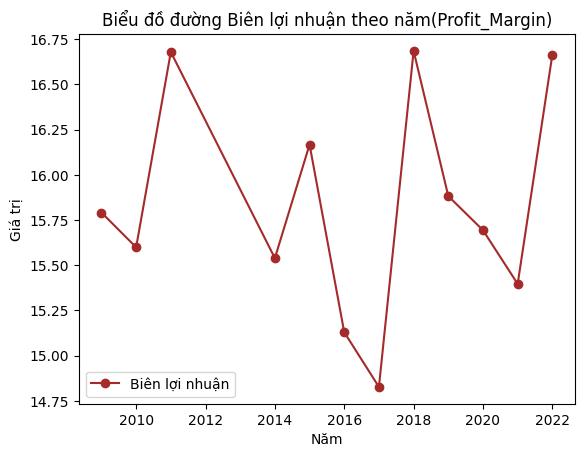

In [ ]:
# Biểu đồ đường cho biên lợi nhuận theo năm(Profit_Margin)
profit_margin_by_year.plot(kind='line',marker='o', label='Biên lợi nhuận', color='brown')

plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.title('Biểu đồ đường Biên lợi nhuận theo năm(Profit_Margin)')
plt.legend()
plt.show()

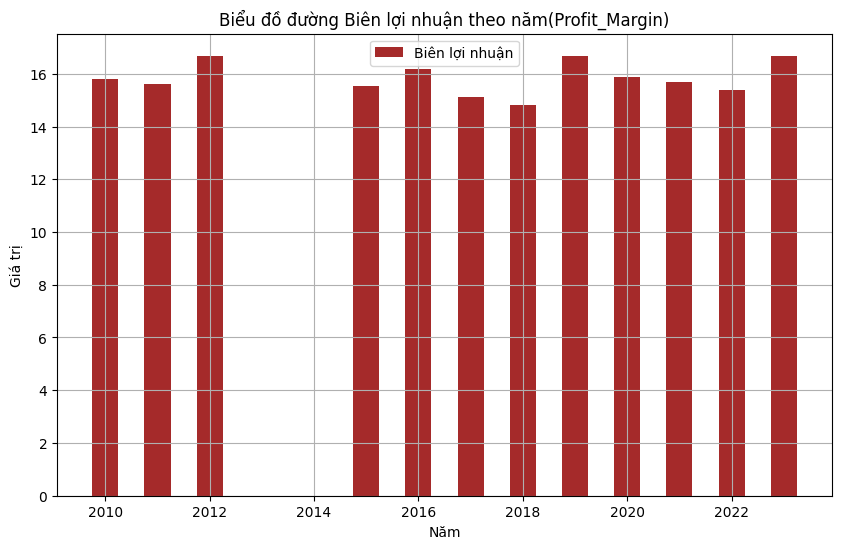

In [ ]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
width = 0.5
bar3 = ax.bar(profit_margin_by_year.index + 2*width, profit_margin_by_year, width, label='Biên lợi nhuận',color='brown')

# Set the labels and title
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị')
ax.set_title('Biểu đồ đường Biên lợi nhuận theo năm(Profit_Margin)')
ax.legend()
plt.grid()
plt.show()

* Xem xét các khoản nợ của ngân hàng, bao gồm nợ vay từ khách hàng và nợ vay từ các tổ chức khác.

TỔNG NỢ CHO KHÁCH HÀNG VAY THEO NĂM(customer_loans_by_year)

In [ ]:
# Tính toán tổng nợ cho khách hàng vay
customer_loans_by_year = data_grouped_by_year['Customer_Loans'].sum()

# In kết quả
print("\nTổng nợ cho khách hàng vay theo năm:")
print(customer_loans_by_year)



Tổng nợ cho khách hàng vay theo năm:
DATE
2009    2835289
2010    5431885
2011    5106944
2014    3727904
2015    5351996
2016    5544732
2017    5695419
2018    5541102
2019    5525303
2020    5763119
2021    5657215
2022    2716602
Name: Customer_Loans, dtype: int64


DỰ ĐOÁN TỔNG NỢ CHO KHÁCH HÀNG VAY THEO NĂM(customer_loans_by_year) CHO NĂM TIẾP THEO

In [ ]:
# Tạo DataFrame từ dữ liệu nợ cho khách hàng vay
X_customer_loans = customer_loans_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_customer_loans = customer_loans_by_year.values  # Lợi nhuận trước thuế (target)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_customer_loans, X_test_customer_loans, y_train_customer_loans, y_test_customer_loans = train_test_split(X_customer_loans, y_customer_loans, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình KNN
model_customer_loans = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_customer_loans.fit(X_train_customer_loans, y_train_customer_loans)

# Dự đoán và đánh giá
y_pred_knn = model_customer_loans.predict(X_test_customer_loans)
mse_knn = mean_squared_error(y_test_customer_loans, y_pred_knn)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 2061091840277.778


In [ ]:
# Dự đoán tổng nợ cho khách hàng vay cho năm tiếp theo (2023 chẳng hạn)
predicted_customer_loans_2023 = model_customer_loans.predict([[2023]])
print(f"Dự đoán tổng nợ cho khác hàng vay cho năm 2023: {predicted_customer_loans_2023[0]}")

Dự đoán tổng nợ cho khác hàng vay cho năm 2023: 4594335.666666667


TỔNG NỢ VAY TỪ CÁC TỔ CHỨC KHÁC THEO NĂM(loans_from_other_organizations_by_year)

In [ ]:
# Tính toán tổng nợ vay từ các tổ chức khác
loans_from_other_organizations_by_year = data_grouped_by_year['Loans_from_Other_Organizations'].sum()

print("\nNợ vay từ các tổ chức khác theo năm:")
print(loans_from_other_organizations_by_year)


Nợ vay từ các tổ chức khác theo năm:
DATE
2009    1421444
2010    2629738
2011    2343173
2014    1756398
2015    2597992
2016    2763697
2017    2691136
2018    2574502
2019    2664730
2020    2594326
2021    2695968
2022    1201869
Name: Loans_from_Other_Organizations, dtype: int64


DỰ ĐOÁN TỔNG NỢ VAY TỪ CÁC TỔ CHỨC KHÁC THEO NĂM(loans_from_other_organizations_by_year) CHO NĂM TIẾP THEO

In [ ]:
# Tạo DataFrame từ dữ liệu nợ vay từ các tổ chức khác
X_organizations = loans_from_other_organizations_by_year.index.values.reshape(-1, 1)  # Năm (feature)
y_organizations = loans_from_other_organizations_by_year.values  # Lợi nhuận trước thuế (target)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_organizations, X_test_organizations, y_train_organizations, y_test_organizations = train_test_split(X_organizations, y_organizations, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình KNN
model_organizations = KNeighborsRegressor(n_neighbors=3)

# Huấn luyện mô hình
model_organizations.fit(X_train_organizations, y_train_organizations)

# Dự đoán và đánh giá
y_pred_knn = model_organizations.predict(X_test_organizations)
mse_knn = mean_squared_error(y_test_organizations, y_pred_knn)
print(f"KNN MSE: {mse_knn}")

KNN MSE: 392174282017.2964


In [ ]:
# Dự đoán tổng nợ vay từ các tổ chức khác cho năm tiếp theo (2023 chẳng hạn)
predicted_organizations_2023 = model_organizations.predict([[2023]])
print(f"Dự đoán tổng nợ vay từ các tổ chức khác cho năm 2023: {predicted_organizations_2023[0]}")

Dự đoán tổng nợ vay từ các tổ chức khác cho năm 2023: 2147033.6666666665


TRỰC QUAN HOÁ CHO CÁC KHOẢN NỢ CỦA NGÂN HÀNG

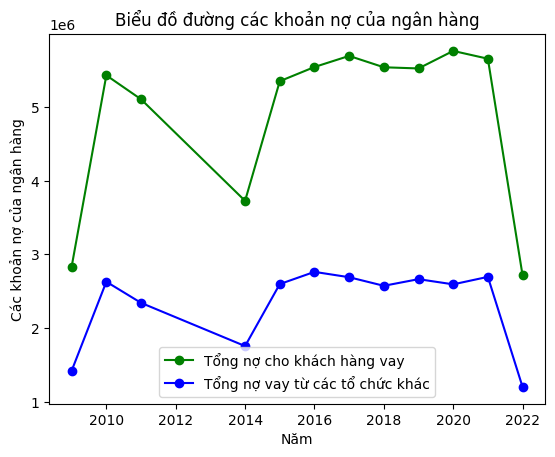

In [ ]:
# Biểu đồ đường cho các khoản nợ của ngân hàng
customer_loans_by_year.plot(kind='line',marker='o', label='Tổng nợ cho khách hàng vay',color='green')
loans_from_other_organizations_by_year.plot(kind='line',marker='o', label='Tổng nợ vay từ các tổ chức khác',color='b')

plt.xlabel('Năm')
plt.ylabel('Các khoản nợ của ngân hàng')
plt.title('Biểu đồ đường các khoản nợ của ngân hàng')
plt.legend()
plt.show()

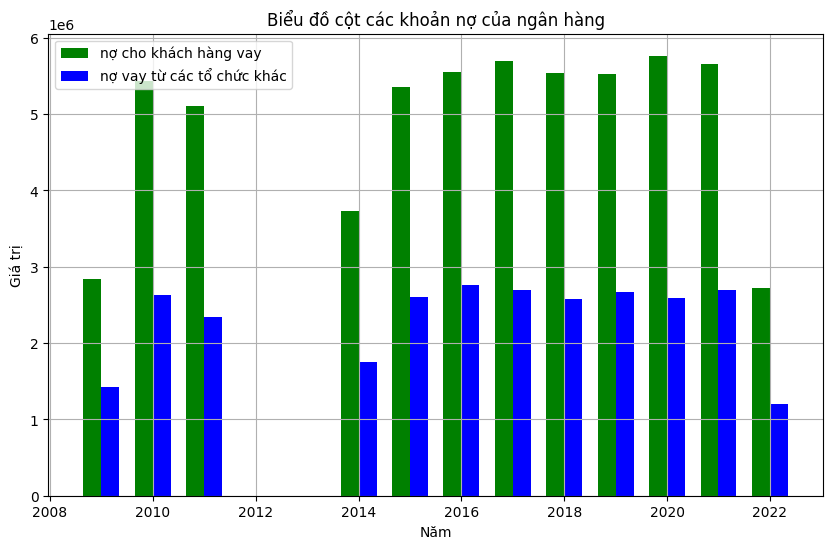

In [ ]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
width = 0.35
bar = ax.bar(customer_loans_by_year.index - width/2, customer_loans_by_year, width, label='nợ cho khách hàng vay',color='green')
bar1 = ax.bar(loans_from_other_organizations_by_year.index + width/2, loans_from_other_organizations_by_year, width, label='nợ vay từ các tổ chức khác',color='b')

# Set the labels and title
ax.set_xlabel('Năm')
ax.set_ylabel('Giá trị')
ax.set_title('Biểu đồ cột các khoản nợ của ngân hàng')
ax.legend()
plt.grid()
plt.show()

THÔNG TIN VỀ SỐ LƯỢNG VÀ PHÂN LOẠI KHÁC HÀNG

In [ ]:
#Tổng số khách hàng
customer_counts = df['Number_of_Customers'].sum()

# Tính toán số lượng khách hàng theo phân loại
customer_classification_counts = df['Customer_Classification'].value_counts()

# In kết quả
print("\nTổng số khách hàng:")
print(customer_counts)

print("\nSố lượng khách hàng theo phân loại:")
print(customer_classification_counts)

# Tính toán số lượng khách hàng theo năm và phân loại
customer_counts_by_year_and_classification = df.groupby([df['DATE'].dt.year, 'Customer_Classification'])['Customer_Classification'].count().unstack()

print("\nSố lượng khách hàng theo năm và phân loại:")
print(customer_counts_by_year_and_classification)


Tổng số khách hàng:
14435200

Số lượng khách hàng theo phân loại:
Customer_Classification
Corporate    915
Retail       892
SME          835
Name: count, dtype: int64

Số lượng khách hàng theo năm và phân loại:
Customer_Classification  Corporate  Retail  SME
DATE                                           
2009                            45      38   49
2010                            81      86   83
2011                            86      73   64
2014                            57      57   54
2015                            84      79   85
2016                            92      83   76
2017                            73      96   81
2018                            76      91   81
2019                           104      70   76
2020                            99      78   75
2021                            74     100   76
2022                            44      41   35


TRỰC QUAN HOÁ THÔNG TIN VỀ SỐ LƯỢNG VÀ PHÂN LOẠI KHÁC HÀNG

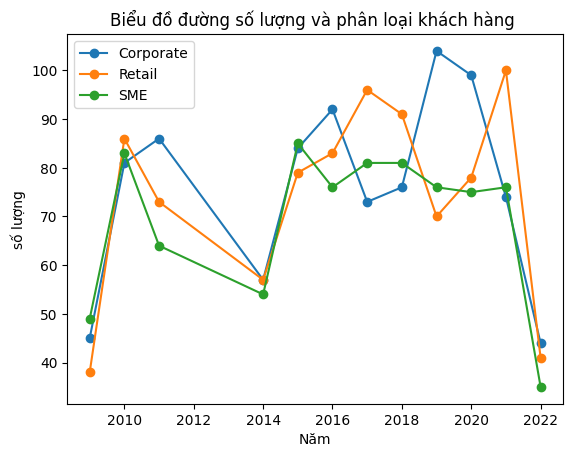

In [ ]:
# Biểu đồ đường cho số lượng và phân loại khách hàng
customer_counts_by_year_and_classification.plot(kind='line',marker='o', label='Tổng nợ cho khách hàng vay')

plt.xlabel('Năm')
plt.ylabel('số lượng')
plt.title('Biểu đồ đường số lượng và phân loại khách hàng ')
plt.legend()
plt.show()